In this notebook we're going to analyze and compare how different classifiers behave when dealing with activity recognition. We take 6 classifiers: KNearestNeighbor, DecisionTree, RandomForest, Support-vector classification, Logistic regression and Gaussian Naive-Bayes. We compute precision, recall and f1-score for each of them so that we can confront the results, to find out which is the best classifier.

In [1]:
import numpy as np
import sys
sys.path.append("creation_functions")
from creation_functions.utilities import create_time_series, preprocessing

In [2]:
non_corr_df = preprocessing(create_time_series())

X=non_corr_df.drop(["class", "subject", "trial"], axis=1)
y=non_corr_df["class"]

K_FEATURES = 40

Processing file: A_DeviceMotion_data/dws_1/sub_1.csv
Processing file: A_DeviceMotion_data/dws_1/sub_2.csv
Processing file: A_DeviceMotion_data/dws_1/sub_3.csv
Processing file: A_DeviceMotion_data/dws_1/sub_4.csv
Processing file: A_DeviceMotion_data/dws_1/sub_5.csv
Processing file: A_DeviceMotion_data/dws_1/sub_6.csv
Processing file: A_DeviceMotion_data/dws_1/sub_7.csv
Processing file: A_DeviceMotion_data/dws_1/sub_8.csv
Processing file: A_DeviceMotion_data/dws_1/sub_9.csv
Processing file: A_DeviceMotion_data/dws_1/sub_10.csv
Processing file: A_DeviceMotion_data/dws_1/sub_11.csv
Processing file: A_DeviceMotion_data/dws_1/sub_12.csv
Processing file: A_DeviceMotion_data/dws_1/sub_13.csv
Processing file: A_DeviceMotion_data/dws_1/sub_14.csv
Processing file: A_DeviceMotion_data/dws_1/sub_15.csv
Processing file: A_DeviceMotion_data/dws_1/sub_16.csv
Processing file: A_DeviceMotion_data/dws_1/sub_17.csv
Processing file: A_DeviceMotion_data/dws_1/sub_18.csv
Processing file: A_DeviceMotion_data/

C:\Users\marco\Desktop\università\magistrale\data mining and machine learning\project_final\LavorettiFinali\creation_functions\utilities.py:56: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = only_numeric_dataset.corr().abs()


In [3]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score, accuracy_score


knn_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=K_FEATURES)),
    ("classifier", KNeighborsClassifier(n_neighbors=5))
])

res=cross_validate(knn_pipe, X, y, scoring={
    'precision': make_scorer(precision_score, average="weighted"),
    'recall': make_scorer(recall_score, average="weighted"),
    'f1score':make_scorer(f1_score, average="weighted")
}, cv=KFold(5, shuffle=True))

knn_results={'precision': res['test_precision'].mean(), 'recall': res["test_recall"].mean(), "f1":res['test_f1score'].mean()}
print(knn_results)

{'precision': 0.9629183931982576, 'recall': 0.9613777526821006, 'f1': 0.9618598117154387}


In [4]:
from sklearn.svm import SVC
SVC_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=K_FEATURES)),
    ("classifier", SVC())
])

res=cross_validate(SVC_pipe, X, y, scoring={
    'precision': make_scorer(precision_score, average="weighted"),
    'recall': make_scorer(recall_score, average="weighted"),
    'f1score':make_scorer(f1_score, average="weighted")
}, cv=KFold(5, shuffle=True))

SVC_results={'precision': res['test_precision'].mean(), 'recall': res["test_recall"].mean(), "f1":res['test_f1score'].mean()}

print(SVC_results)

{'precision': 0.9659013994584082, 'recall': 0.9651044607566346, 'f1': 0.9652889156214828}


In [5]:
from sklearn.tree import DecisionTreeClassifier
tree_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=K_FEATURES)),
    ("classifier", DecisionTreeClassifier())
])

res=cross_validate(tree_pipe, X, y, scoring={
    'precision': make_scorer(precision_score, average="weighted"),
    'recall': make_scorer(recall_score, average="weighted"),
    'f1score':make_scorer(f1_score, average="weighted")
}, cv=KFold(5, shuffle=True))

tree_results={'precision': res['test_precision'].mean(), 'recall': res["test_recall"].mean(), "f1":res['test_f1score'].mean()}

print(tree_results)

{'precision': 0.932820612911726, 'recall': 0.9314511575381141, 'f1': 0.9319393499355824}


In [6]:
from sklearn.ensemble import RandomForestClassifier
ranfor_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=K_FEATURES)),
    ("classifier", RandomForestClassifier(n_jobs=-1))
])

res=cross_validate(ranfor_pipe, X, y, scoring={
    'precision': make_scorer(precision_score, average="weighted"),
    'recall': make_scorer(recall_score, average="weighted"),
    'f1score':make_scorer(f1_score, average="weighted"),
    'accuracy':make_scorer(accuracy_score)
}, cv=KFold(5, shuffle=True, random_state=12))

ranfor_results={'precision': res['test_precision'].mean(), 'recall': res["test_recall"].mean(), "f1":res['test_f1score'].mean()}

print(ranfor_results)

{'precision': 0.9737235608140982, 'recall': 0.9736871823828345, 'f1': 0.9736794387467956}


In [7]:
from sklearn.linear_model import LogisticRegression
logregr_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=K_FEATURES)),
    ("classifier", LogisticRegression(max_iter=1000))
])

res=cross_validate(logregr_pipe, X, y, scoring={
    'precision': make_scorer(precision_score, average="weighted"),
    'recall': make_scorer(recall_score, average="weighted"),
    'f1score':make_scorer(f1_score, average="weighted")
}, cv=KFold(5, shuffle=True))

logregr_results={'precision': res['test_precision'].mean(), 'recall': res["test_recall"].mean(), "f1":res['test_f1score'].mean()}

print(logregr_results)

{'precision': 0.9483017182649842, 'recall': 0.946583850931677, 'f1': 0.9470683256847249}


In [8]:
from sklearn.naive_bayes import GaussianNB
nb_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=K_FEATURES)),
    ("classifier", GaussianNB())
])

res=cross_validate(nb_pipe, X, y, scoring={
    'precision': make_scorer(precision_score, average="weighted"),
    'recall': make_scorer(recall_score, average="weighted"),
    'f1score':make_scorer(f1_score, average="weighted")
}, cv=KFold(5, shuffle=True))

nb_results={'precision': res['test_precision'].mean(), 'recall': res["test_recall"].mean(), "f1":res['test_f1score'].mean()}

print(nb_results)

{'precision': 0.7642039551864453, 'recall': 0.7217391304347827, 'f1': 0.7153011036735882}


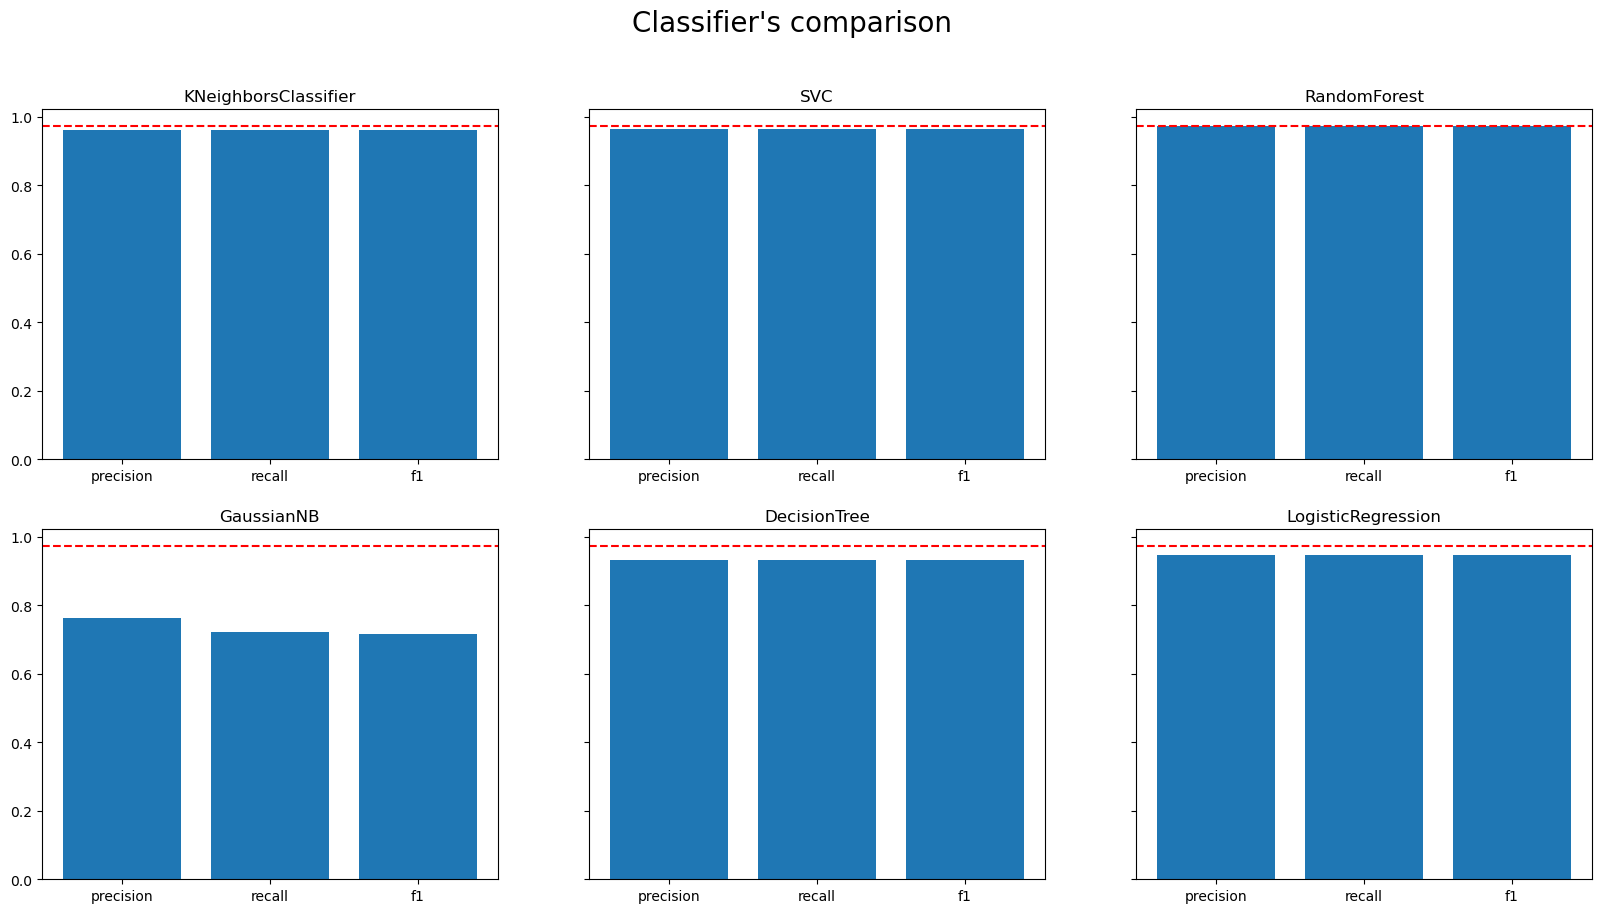

In [9]:
from matplotlib import pyplot as plt
f,axes=plt.subplots(2,3,figsize=(20,10), sharey=True)
f.suptitle("Classifier's comparison", fontsize=20)
h_max=np.max(list(ranfor_results.values()))
axes[0][0].bar(knn_results.keys(), knn_results.values())
axes[0][0].axhline(y = h_max, color = 'r', linestyle = 'dashed')
axes[0][0].title.set_text("KNeighborsClassifier")
axes[0][1].bar(SVC_results.keys(), SVC_results.values())
axes[0][1].axhline(y = h_max, color = 'r', linestyle = 'dashed')
axes[0][1].title.set_text("SVC")
axes[0][2].bar(ranfor_results.keys(), ranfor_results.values())
axes[0][2].axhline(y = h_max, color = 'r', linestyle = 'dashed')
axes[0][2].title.set_text("RandomForest")
axes[1][0].bar(nb_results.keys(), nb_results.values())
axes[1][0].axhline(y = h_max, color = 'r', linestyle = 'dashed')
axes[1][0].title.set_text("GaussianNB")
axes[1][1].bar(tree_results.keys(), tree_results.values())
axes[1][1].axhline(y = h_max, color = 'r', linestyle = 'dashed')
axes[1][1].title.set_text("DecisionTree")
axes[1][2].bar(logregr_results.keys(), logregr_results.values())
axes[1][2].axhline(y = h_max, color = 'r', linestyle = 'dashed')
axes[1][2].title.set_text("LogisticRegression")

From this analysis we see that Random Forest and Decision Tree are the 2 best classifiers for our purpose. KNearestNeighbors follows them. Let's see what we can achieve if we do some parameter tuning.

Text(0, 0.5, 'Accuracy')

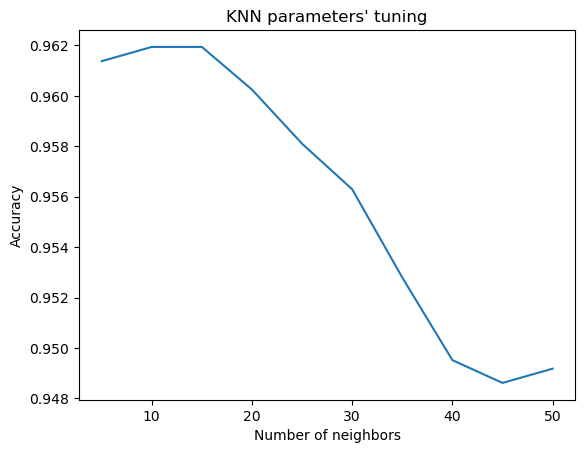

In [10]:
from sklearn.model_selection import cross_val_score

# let's see how KNN behave if we change the number of neighbors
results_list=[]


for n in range(1,51,5):
    pipe=Pipeline([
        ("scaler", RobustScaler()),
        ("sampling", SMOTE()),
        ("feature-selector", SelectKBest(k=K_FEATURES)),
        ("classifier", KNeighborsClassifier(n_neighbors=n))
    ])
    results=cross_val_score(pipe,X,y,cv=KFold(5, shuffle=True, random_state=123) )
    results_list.append(np.mean(results))

x=np.arange(1,11)
x*=5
plt.plot(x, results_list)
plt.title("KNN parameters' tuning")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

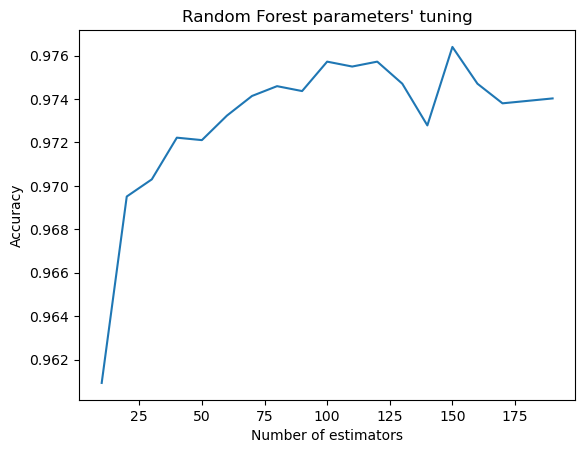

In [11]:
# Let's see how Random forest behave when changing the number of trees
results_list=[]


for n in range(10,200,10):
    pipe=Pipeline([
        ("scaler", RobustScaler()),
        ("sampling", SMOTE()),
        ("feature-selector", SelectKBest(k=K_FEATURES)),
        ("classifier", RandomForestClassifier(n_jobs=-1, n_estimators=n))
    ])
    results=cross_val_score(pipe,X,y,cv=KFold(5, shuffle=True, random_state=123) )
    results_list.append(np.mean(results))

x=np.arange(1,20)
x*=10
plt.plot(x, results_list)
plt.title("Random Forest parameters' tuning")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")

We see that decision tree is actually the best classifier out of all the six described above. Let's see where it fails with a confusion matrix.

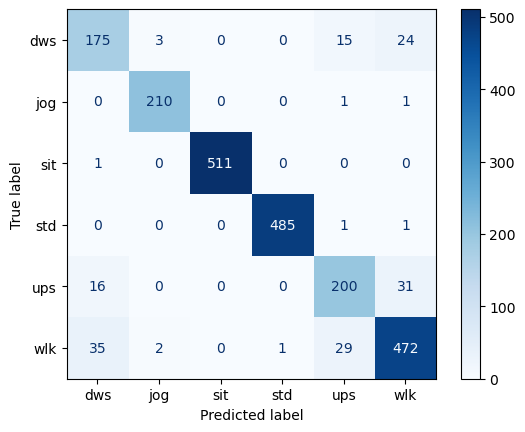

In [12]:
# let's print a confusion matrix in order to understand how the classifier is working
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
tree_pipe.fit(X_train, y_train)
y_pred=tree_pipe.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=y.unique(), cmap=plt.cm.Blues)

As we can see we obtain pretty good results. We don't need any further commentary.